## Import Modules and Prerequisites
---
Please use this section to import any necessary modules that will be required later in this notebook like the example given.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# add any needed libraries
from pathlib import Path
from audioblock import *
from model import *
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, GroupKFold
from sklearn.utils.class_weight import compute_class_weight
from sklearn.preprocessing import StandardScaler
import tensorflow.keras as keras
from keras.callbacks import EarlyStopping
%matplotlib inline

## Automatic Speech Recognition
---
#### Note: There is no expectation of coding a highly sophisticated solution in this current small time period. Each question can be answered either with a short code example along with a possible written explaination of a more elaborate approach or with not highly tuned models, due to lack of available resources and time.

A common task in Acoustics is to predict the speaker from corresponding audio signals (speaker identification). In the provided corpus (see the project description), you can find transcripts under various speech settings and speaking conditions. 

### 1. Train a classifier on the Solo Speech condition dataset that will reach an acceptable accuracy score.
---
Feel free to follow any design choices you feel fit the problem best. Briefly describe your approach in markdown cells, along with any necessary comments on your choices. Explain your choices with the appropriate evaluation plots - analysis

In [2]:
#Path initialization
ROOT_PATH = Path.cwd()
ROOT_DATASET_PATH = ROOT_PATH.joinpath('dataset')
SOLO_DATASET_PATH = ROOT_DATASET_PATH.joinpath('data').joinpath('solo')
SOLO_FEATURES_EXPORT_PATH = ROOT_DATASET_PATH.joinpath('solo_ftrs.pickle')
OUTPUT_PATH = ROOT_PATH.joinpath('output')

Audio Feature Extraction

In [3]:
#Create a list which contains all the audio files' paths in solo dataset
audiofiles_solo = list((SOLO_DATASET_PATH).glob('**/*.wav'))

# Extract audio features for SOLO dataset
create_features_dataset(filepaths=audiofiles_solo, exportpath=SOLO_FEATURES_EXPORT_PATH)

Processing file frf01_s12_solo.wav !!!
Processing file frf01_s13_solo.wav !!!
Processing file frf01_s18_solo.wav !!!
Processing file frf01_s19_solo.wav !!!
Processing file frf01_s26_solo.wav !!!
Processing file frf01_s27_solo.wav !!!
Processing file frf01_s05_solo.wav !!!
Processing file frf01_s04_solo.wav !!!
Raised the exception: Input is too short (n=25938) for frame_length=32000 for file frf01_s04_solo.wav Skipping...
Processing file frf01_f01_solo.wav !!!
Processing file frf01_s31_solo.wav !!!
Processing file frf01_s30_solo.wav !!!
Processing file frf01_s02_solo.wav !!!
Raised the exception: Input is too short (n=28704) for frame_length=32000 for file frf01_s02_solo.wav Skipping...
Processing file frf01_s03_solo.wav !!!
Raised the exception: Input is too short (n=22998) for frame_length=32000 for file frf01_s03_solo.wav Skipping...
Processing file frf01_s08_solo.wav !!!
Raised the exception: Input is too short (n=30952) for frame_length=32000 for file frf01_s08_solo.wav Skipping..

Setting up the experiment

In [4]:
# Split dataset into train, validation and test sets for experimentation purposes
def prepare_dataset(X, y, test_size=0.2, validation_size=0.2):
    """Creates train, validation and test sets."""

    # create train, validation, test split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size)
    X_train, X_validation, y_train, y_validation = train_test_split(X_train, y_train, test_size=validation_size)

    return X_train, y_train, X_validation, y_validation, X_test, y_test

Data loaded successfully!
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2 (LSTM)               (None, 63, 256)           303104    
                                                                 
 lstm_3 (LSTM)               (None, 256)               525312    
                                                                 
 dense_2 (Dense)             (None, 64)                16448     
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                                 
 dense_3 (Dense)             (None, 36)                2340      
                                                                 
Total params: 847,204
Trainable params: 847,204
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100


2023-01-05 22:20:32.201666: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-01-05 22:20:32.490873: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-01-05 22:20:32.595060: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-01-05 22:20:32.721994: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-01-05 22:20:32.893854: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


152/152 [==============================] - ETA: 0s - loss: 3.5249 - accuracy: 0.0512

2023-01-05 22:20:38.843927: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-01-05 22:20:38.956053: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-01-05 22:20:39.044352: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


152/152 [==============================] - 8s 46ms/step - loss: 3.5249 - accuracy: 0.0512 - val_loss: 3.3905 - val_accuracy: 0.0908
Epoch 2/100
152/152 [==============================] - 6s 39ms/step - loss: 3.1949 - accuracy: 0.1310 - val_loss: 2.8607 - val_accuracy: 0.2112
Epoch 3/100
152/152 [==============================] - 6s 39ms/step - loss: 2.7233 - accuracy: 0.2409 - val_loss: 2.2366 - val_accuracy: 0.4818
Epoch 4/100
152/152 [==============================] - 6s 40ms/step - loss: 2.1658 - accuracy: 0.4083 - val_loss: 1.7822 - val_accuracy: 0.5644
Epoch 5/100
152/152 [==============================] - 6s 40ms/step - loss: 1.7781 - accuracy: 0.4963 - val_loss: 1.3410 - val_accuracy: 0.6551
Epoch 6/100
152/152 [==============================] - 6s 40ms/step - loss: 1.4299 - accuracy: 0.6120 - val_loss: 1.1237 - val_accuracy: 0.7112
Epoch 7/100
152/152 [==============================] - 6s 41ms/step - loss: 1.2409 - accuracy: 0.6798 - val_loss: 1.0100 - val_accuracy: 0.7294
Epoc

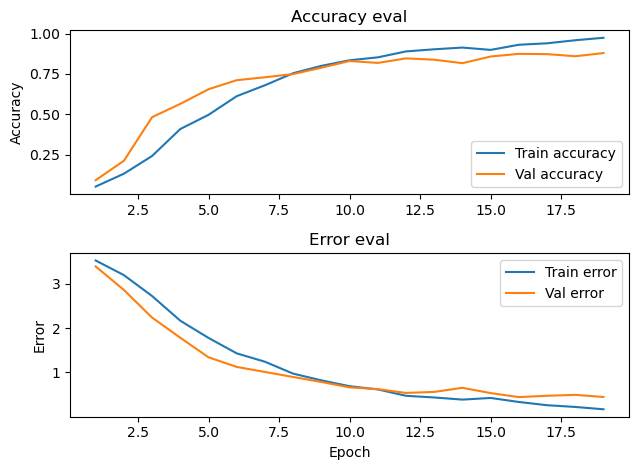

2023-01-05 22:22:31.461015: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-01-05 22:22:31.566776: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-01-05 22:22:31.657032: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


24/24 [==============================] - 1s 24ms/step


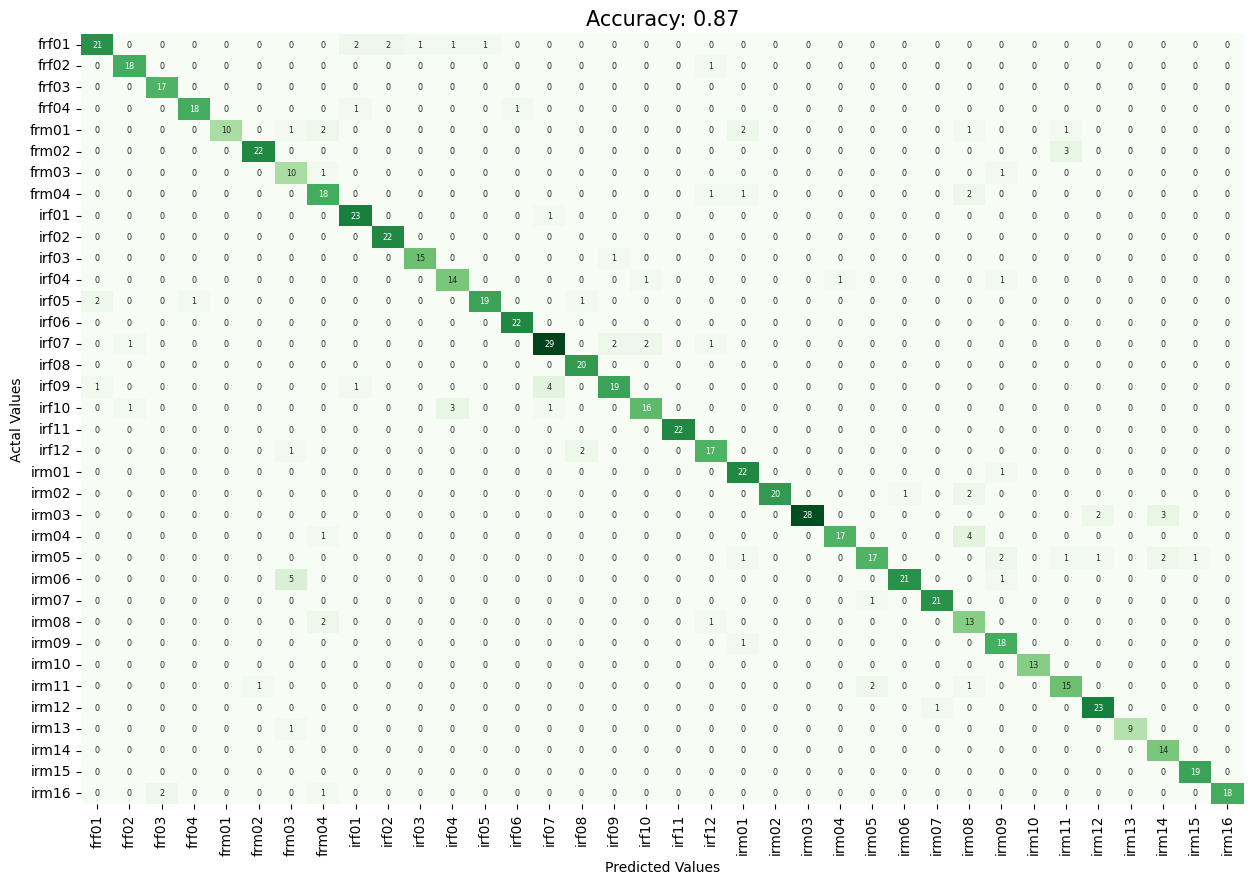

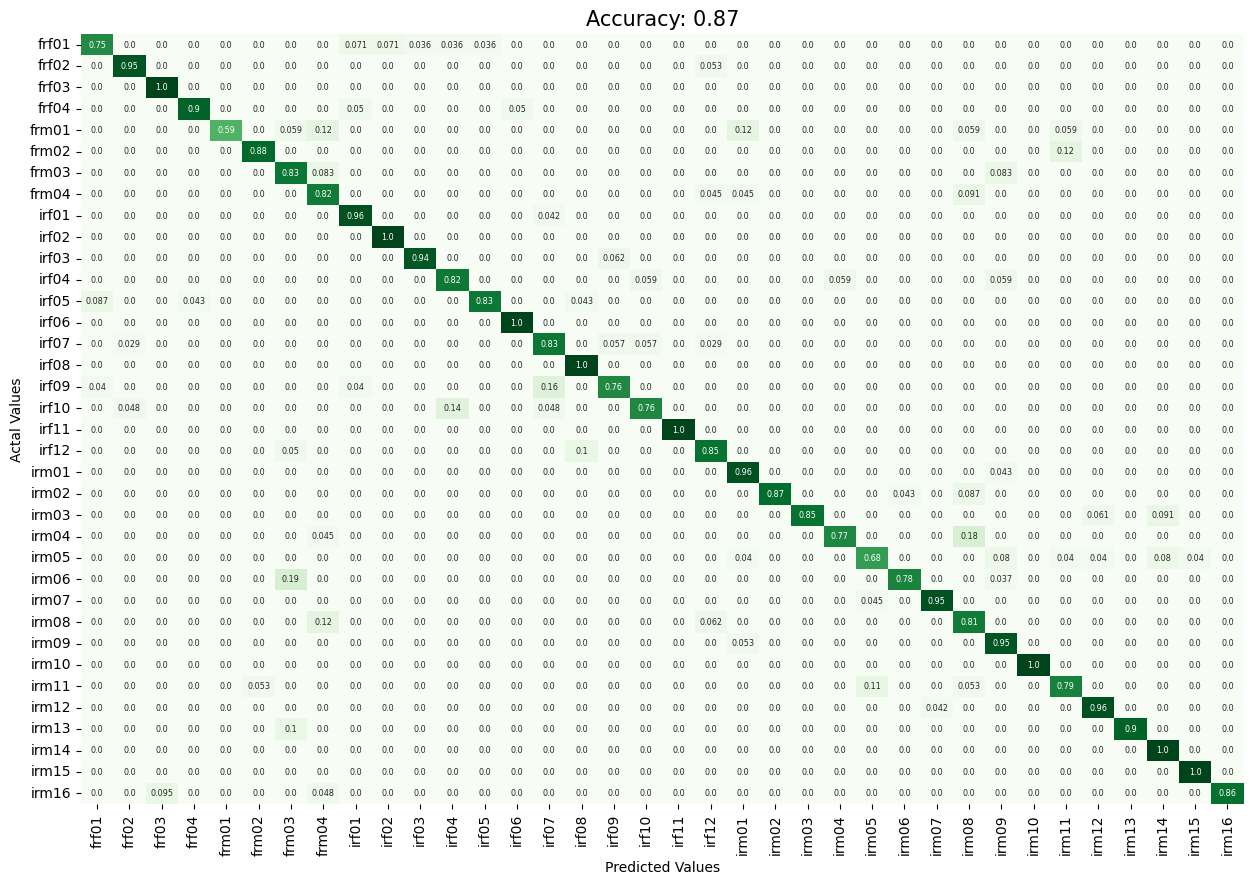

In [6]:
MAX_EPOCHS = 100
BATCH_SIZE = 16

#Load the extracted feature set for the SOLO dataset
X, y, filename = load_data(data_path = SOLO_FEATURES_EXPORT_PATH)

#Label encoding
le = LabelEncoder()
y_enc = le.fit_transform(y)

#Split the dataset in train, val, test sets
X_train, y_train, X_val, y_val, X_test, y_test = prepare_dataset(X, y_enc)

#Calculate the class weights (not totally necessary, the dataset is balanced in general)
class_weights = compute_class_weight(
                                        class_weight = "balanced",
                                        classes = np.unique(y_train),
                                        y = y_train                                                   
                                    )
class_weights = dict(zip(np.unique(y_train), class_weights))

# Create the deep neural network
input_shape = (X_train.shape[1], X_train.shape[2]) # timesteps=63, features=39
n_classes = len(list(le.classes_))
model = build_model(input_shape, n_classes)

# Train model using earling stopping as we have a validation set
callback = EarlyStopping(monitor='val_loss', mode='min', patience=3)
history = model.fit(
    X_train, y_train, 
    validation_data=(X_val, y_val), 
    batch_size=BATCH_SIZE, 
    epochs=MAX_EPOCHS, 
    class_weight=class_weights,
    callbacks=[callback]
)

# plot accuracy/error for training and validation
plot_history(history, fullpath=OUTPUT_PATH.joinpath('train_history_step1_train_test_split.jpg'))

#Make predictions
y_prob = model.predict(X_test)
y_pred = np.argmax(y_prob, axis=1)

#Store results
y_test = le.inverse_transform(y_test)
y_pred = le.inverse_transform(y_pred)

preds_df = pd.DataFrame({
    'label': y_test,
    'prediction': y_pred
})
probs_df = pd.DataFrame(data=y_prob, columns=list(le.classes_))
results = pd.concat([preds_df, probs_df], axis=1)

plot_confusion_matrix(results['label'].values, results['prediction'].values, norm=False, fullpath=OUTPUT_PATH.joinpath('step1_cm_train_test_split.jpg'))
plot_confusion_matrix(results['label'].values, results['prediction'].values, norm=True, fullpath=OUTPUT_PATH.joinpath('step1_normalized_cm_train_test_split.jpg'))

# Save results locally in pickle format
fname = OUTPUT_PATH.joinpath('step1_results_train_test_split.pickle')
fname.parent.mkdir(parents=True, exist_ok=True)
with open(fname, 'wb') as f:
    pickle.dump(results, f)


Data loaded successfully!
Fold 1:
Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_4 (LSTM)               (None, 63, 256)           303104    
                                                                 
 lstm_5 (LSTM)               (None, 256)               525312    
                                                                 
 dense_4 (Dense)             (None, 64)                16448     
                                                                 
 dropout_2 (Dropout)         (None, 64)                0         
                                                                 
 dense_5 (Dense)             (None, 36)                2340      
                                                                 
Total params: 847,204
Trainable params: 847,204
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20


2023-01-05 22:22:42.832603: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-01-05 22:22:43.127738: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-01-05 22:22:43.223590: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-01-05 22:22:43.359056: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-01-05 22:22:43.538874: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


152/152 [==============================] - ETA: 0s - loss: 3.5697 - accuracy: 0.0343

2023-01-05 22:22:49.777322: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-01-05 22:22:49.891162: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-01-05 22:22:49.980865: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


152/152 [==============================] - 9s 48ms/step - loss: 3.5697 - accuracy: 0.0343 - val_loss: 3.4935 - val_accuracy: 0.0809
Epoch 2/20
152/152 [==============================] - 6s 40ms/step - loss: 3.3280 - accuracy: 0.0831 - val_loss: 3.0565 - val_accuracy: 0.2261
Epoch 3/20
152/152 [==============================] - 6s 39ms/step - loss: 2.8978 - accuracy: 0.1905 - val_loss: 2.3857 - val_accuracy: 0.4191
Epoch 4/20
152/152 [==============================] - 6s 39ms/step - loss: 2.3729 - accuracy: 0.3186 - val_loss: 1.9374 - val_accuracy: 0.4752
Epoch 5/20
152/152 [==============================] - 6s 41ms/step - loss: 1.9775 - accuracy: 0.4442 - val_loss: 1.7326 - val_accuracy: 0.5660
Epoch 6/20
152/152 [==============================] - 6s 39ms/step - loss: 1.6146 - accuracy: 0.5562 - val_loss: 1.2503 - val_accuracy: 0.7013
Epoch 7/20
152/152 [==============================] - 6s 40ms/step - loss: 1.3306 - accuracy: 0.6186 - val_loss: 1.1974 - val_accuracy: 0.6749
Epoch 8/20

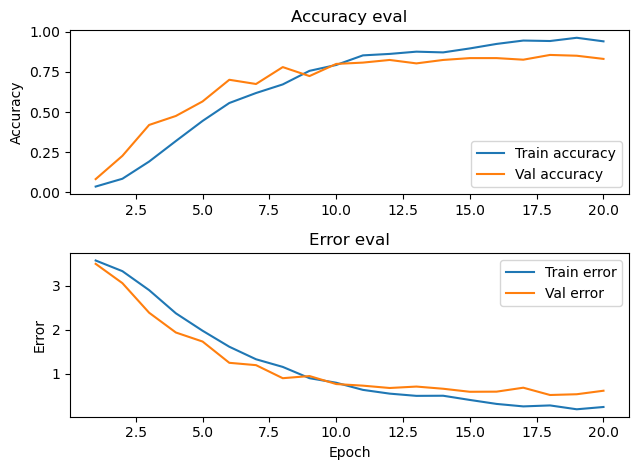

2023-01-05 22:24:47.743638: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-01-05 22:24:47.860562: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


 4/24 [====>.........................] - ETA: 0s 

2023-01-05 22:24:47.959375: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


24/24 [==============================] - 1s 26ms/step
Fold 2:
Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_6 (LSTM)               (None, 63, 256)           303104    
                                                                 
 lstm_7 (LSTM)               (None, 256)               525312    
                                                                 
 dense_6 (Dense)             (None, 64)                16448     
                                                                 
 dropout_3 (Dropout)         (None, 64)                0         
                                                                 
 dense_7 (Dense)             (None, 36)                2340      
                                                                 
Total params: 847,204
Trainable params: 847,204
Non-trainable params: 0
____________________________________________________

2023-01-05 22:24:49.773103: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-01-05 22:24:50.080063: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-01-05 22:24:50.188380: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-01-05 22:24:50.327747: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-01-05 22:24:50.511298: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


152/152 [==============================] - ETA: 0s - loss: 3.5496 - accuracy: 0.0475

2023-01-05 22:24:56.668423: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-01-05 22:24:56.784424: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-01-05 22:24:56.878975: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


152/152 [==============================] - 9s 47ms/step - loss: 3.5496 - accuracy: 0.0475 - val_loss: 3.4867 - val_accuracy: 0.0594
Epoch 2/20
152/152 [==============================] - 6s 40ms/step - loss: 3.3115 - accuracy: 0.0975 - val_loss: 3.0855 - val_accuracy: 0.1782
Epoch 3/20
152/152 [==============================] - 6s 40ms/step - loss: 2.8856 - accuracy: 0.2004 - val_loss: 2.5604 - val_accuracy: 0.3630
Epoch 4/20
152/152 [==============================] - 6s 39ms/step - loss: 2.3553 - accuracy: 0.3450 - val_loss: 2.1609 - val_accuracy: 0.4868
Epoch 5/20
152/152 [==============================] - 6s 38ms/step - loss: 1.9116 - accuracy: 0.4674 - val_loss: 1.6876 - val_accuracy: 0.5957
Epoch 6/20
152/152 [==============================] - 6s 38ms/step - loss: 1.5798 - accuracy: 0.5620 - val_loss: 1.5087 - val_accuracy: 0.6403
Epoch 7/20
152/152 [==============================] - 6s 40ms/step - loss: 1.2336 - accuracy: 0.6640 - val_loss: 1.2136 - val_accuracy: 0.7261
Epoch 8/20

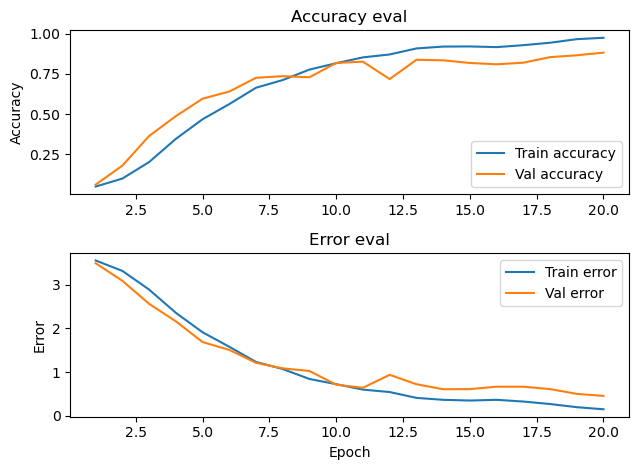

2023-01-05 22:26:51.587077: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-01-05 22:26:51.691248: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


 4/24 [====>.........................] - ETA: 0s 

2023-01-05 22:26:51.792316: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


24/24 [==============================] - 1s 24ms/step
Fold 3:
Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_8 (LSTM)               (None, 63, 256)           303104    
                                                                 
 lstm_9 (LSTM)               (None, 256)               525312    
                                                                 
 dense_8 (Dense)             (None, 64)                16448     
                                                                 
 dropout_4 (Dropout)         (None, 64)                0         
                                                                 
 dense_9 (Dense)             (None, 36)                2340      
                                                                 
Total params: 847,204
Trainable params: 847,204
Non-trainable params: 0
____________________________________________________

2023-01-05 22:26:53.469722: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-01-05 22:26:53.776021: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-01-05 22:26:53.878535: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-01-05 22:26:54.020763: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-01-05 22:26:54.205279: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


152/152 [==============================] - ETA: 0s - loss: 3.5270 - accuracy: 0.0545

2023-01-05 22:27:00.939554: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-01-05 22:27:01.059751: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-01-05 22:27:01.168741: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


152/152 [==============================] - 9s 52ms/step - loss: 3.5270 - accuracy: 0.0545 - val_loss: 3.3975 - val_accuracy: 0.0660
Epoch 2/20
152/152 [==============================] - 6s 41ms/step - loss: 3.1782 - accuracy: 0.1434 - val_loss: 2.9196 - val_accuracy: 0.1568
Epoch 3/20
152/152 [==============================] - 6s 39ms/step - loss: 2.6907 - accuracy: 0.2550 - val_loss: 2.2861 - val_accuracy: 0.3614
Epoch 4/20
152/152 [==============================] - 6s 39ms/step - loss: 2.1835 - accuracy: 0.3810 - val_loss: 1.8640 - val_accuracy: 0.4620
Epoch 5/20
152/152 [==============================] - 6s 39ms/step - loss: 1.8181 - accuracy: 0.5095 - val_loss: 1.5659 - val_accuracy: 0.5710
Epoch 6/20
152/152 [==============================] - 6s 39ms/step - loss: 1.4892 - accuracy: 0.5835 - val_loss: 1.3379 - val_accuracy: 0.6568
Epoch 7/20
152/152 [==============================] - 6s 39ms/step - loss: 1.1801 - accuracy: 0.6901 - val_loss: 1.2195 - val_accuracy: 0.6469
Epoch 8/20

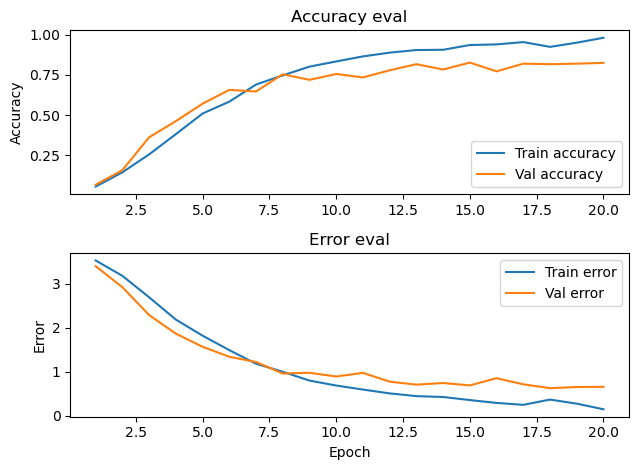

2023-01-05 22:28:56.088864: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-01-05 22:28:56.198018: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


 3/24 [==>...........................] - ETA: 0s 

2023-01-05 22:28:56.301406: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


24/24 [==============================] - 1s 25ms/step
Fold 4:
Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_10 (LSTM)              (None, 63, 256)           303104    
                                                                 
 lstm_11 (LSTM)              (None, 256)               525312    
                                                                 
 dense_10 (Dense)            (None, 64)                16448     
                                                                 
 dropout_5 (Dropout)         (None, 64)                0         
                                                                 
 dense_11 (Dense)            (None, 36)                2340      
                                                                 
Total params: 847,204
Trainable params: 847,204
Non-trainable params: 0
____________________________________________________

2023-01-05 22:28:58.020891: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-01-05 22:28:58.333702: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-01-05 22:28:58.439509: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-01-05 22:28:58.600832: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-01-05 22:28:58.799391: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


152/152 [==============================] - ETA: 0s - loss: 3.5273 - accuracy: 0.0372

2023-01-05 22:29:04.915090: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-01-05 22:29:05.030157: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-01-05 22:29:05.132589: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


152/152 [==============================] - 9s 47ms/step - loss: 3.5273 - accuracy: 0.0372 - val_loss: 3.4303 - val_accuracy: 0.0528
Epoch 2/20
152/152 [==============================] - 6s 39ms/step - loss: 3.2335 - accuracy: 0.0991 - val_loss: 3.0999 - val_accuracy: 0.1320
Epoch 3/20
152/152 [==============================] - 6s 39ms/step - loss: 2.8166 - accuracy: 0.2297 - val_loss: 2.6350 - val_accuracy: 0.3003
Epoch 4/20
152/152 [==============================] - 6s 39ms/step - loss: 2.3376 - accuracy: 0.3689 - val_loss: 2.1934 - val_accuracy: 0.4835
Epoch 5/20
152/152 [==============================] - 6s 39ms/step - loss: 1.8978 - accuracy: 0.4800 - val_loss: 1.7836 - val_accuracy: 0.5759
Epoch 6/20
152/152 [==============================] - 6s 39ms/step - loss: 1.6411 - accuracy: 0.5601 - val_loss: 1.5681 - val_accuracy: 0.6320
Epoch 7/20
152/152 [==============================] - 6s 39ms/step - loss: 1.3045 - accuracy: 0.6464 - val_loss: 1.2591 - val_accuracy: 0.6683
Epoch 8/20

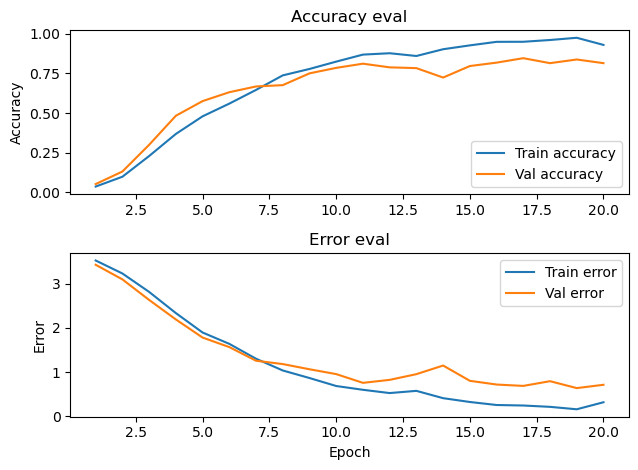

2023-01-05 22:30:59.070335: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-01-05 22:30:59.175514: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


 4/24 [====>.........................] - ETA: 0s 

2023-01-05 22:30:59.280953: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


24/24 [==============================] - 1s 25ms/step
Fold 5:
Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_12 (LSTM)              (None, 63, 256)           303104    
                                                                 
 lstm_13 (LSTM)              (None, 256)               525312    
                                                                 
 dense_12 (Dense)            (None, 64)                16448     
                                                                 
 dropout_6 (Dropout)         (None, 64)                0         
                                                                 
 dense_13 (Dense)            (None, 36)                2340      
                                                                 
Total params: 847,204
Trainable params: 847,204
Non-trainable params: 0
____________________________________________________

2023-01-05 22:31:01.047309: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-01-05 22:31:01.340130: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-01-05 22:31:01.449366: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-01-05 22:31:01.617140: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-01-05 22:31:01.812056: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


152/152 [==============================] - ETA: 0s - loss: 3.5362 - accuracy: 0.0570

2023-01-05 22:31:07.929315: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-01-05 22:31:08.044424: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-01-05 22:31:08.146901: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


152/152 [==============================] - 9s 47ms/step - loss: 3.5362 - accuracy: 0.0570 - val_loss: 3.4476 - val_accuracy: 0.0710
Epoch 2/20
152/152 [==============================] - 6s 39ms/step - loss: 3.2583 - accuracy: 0.1256 - val_loss: 2.9749 - val_accuracy: 0.1799
Epoch 3/20
152/152 [==============================] - 6s 39ms/step - loss: 2.8039 - accuracy: 0.2325 - val_loss: 2.4786 - val_accuracy: 0.3812
Epoch 4/20
152/152 [==============================] - 7s 43ms/step - loss: 2.2793 - accuracy: 0.3767 - val_loss: 1.8815 - val_accuracy: 0.5314
Epoch 5/20
152/152 [==============================] - 6s 41ms/step - loss: 1.8532 - accuracy: 0.5126 - val_loss: 1.4917 - val_accuracy: 0.6716
Epoch 6/20
152/152 [==============================] - 6s 39ms/step - loss: 1.5372 - accuracy: 0.5993 - val_loss: 1.2026 - val_accuracy: 0.7096
Epoch 7/20
152/152 [==============================] - 6s 39ms/step - loss: 1.2145 - accuracy: 0.7001 - val_loss: 1.0091 - val_accuracy: 0.7475
Epoch 8/20

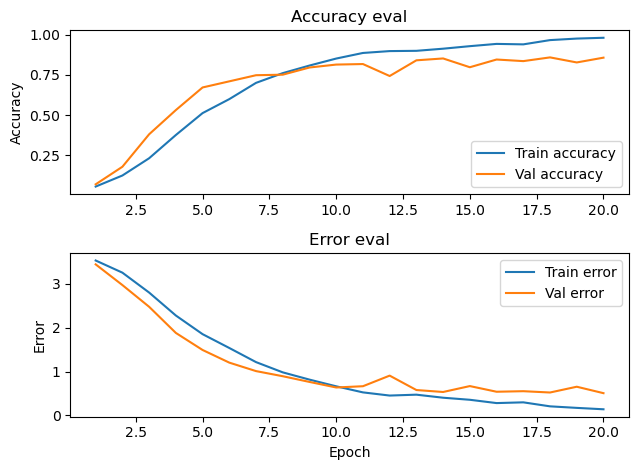

2023-01-05 22:33:03.939437: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-01-05 22:33:04.054798: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


 1/24 [>.............................] - ETA: 12s

2023-01-05 22:33:04.178270: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


24/24 [==============================] - 1s 28ms/step


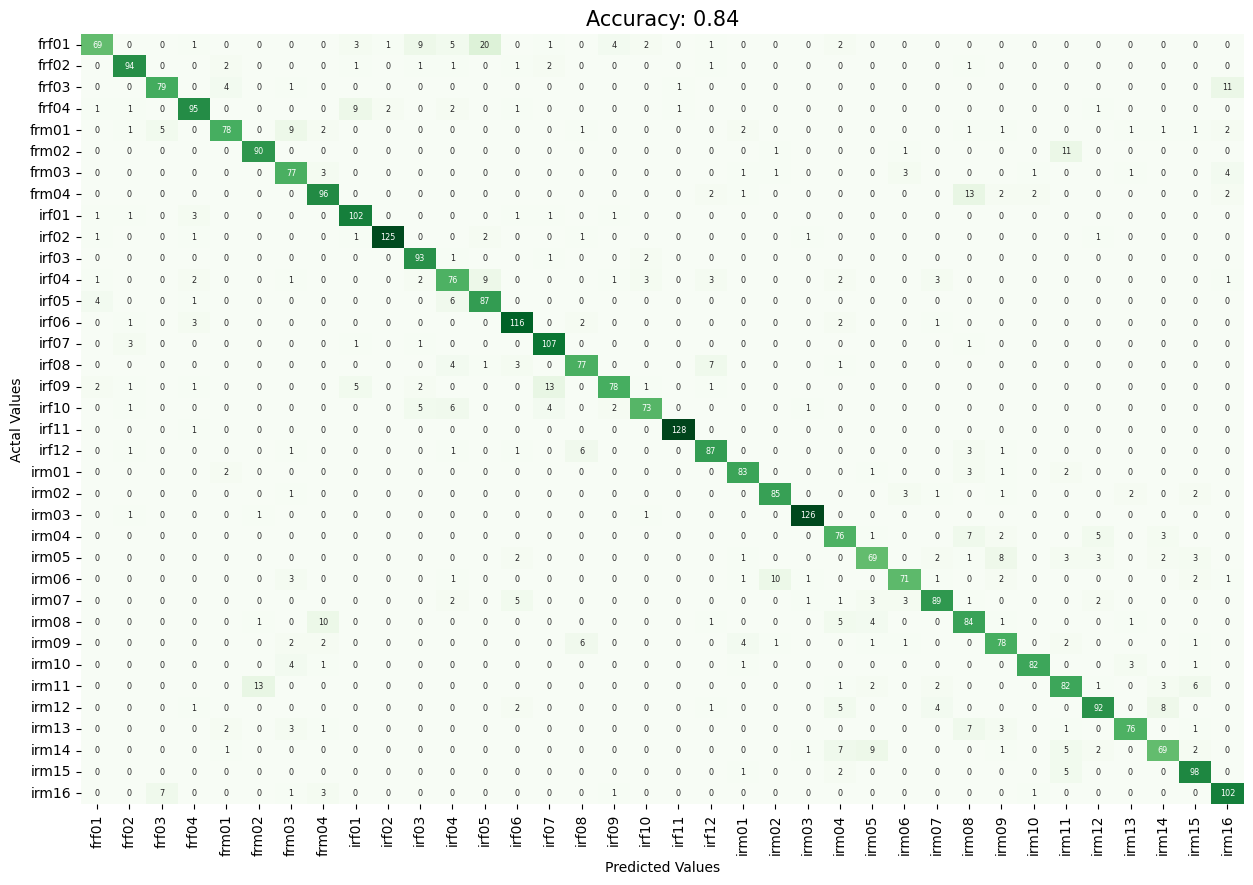

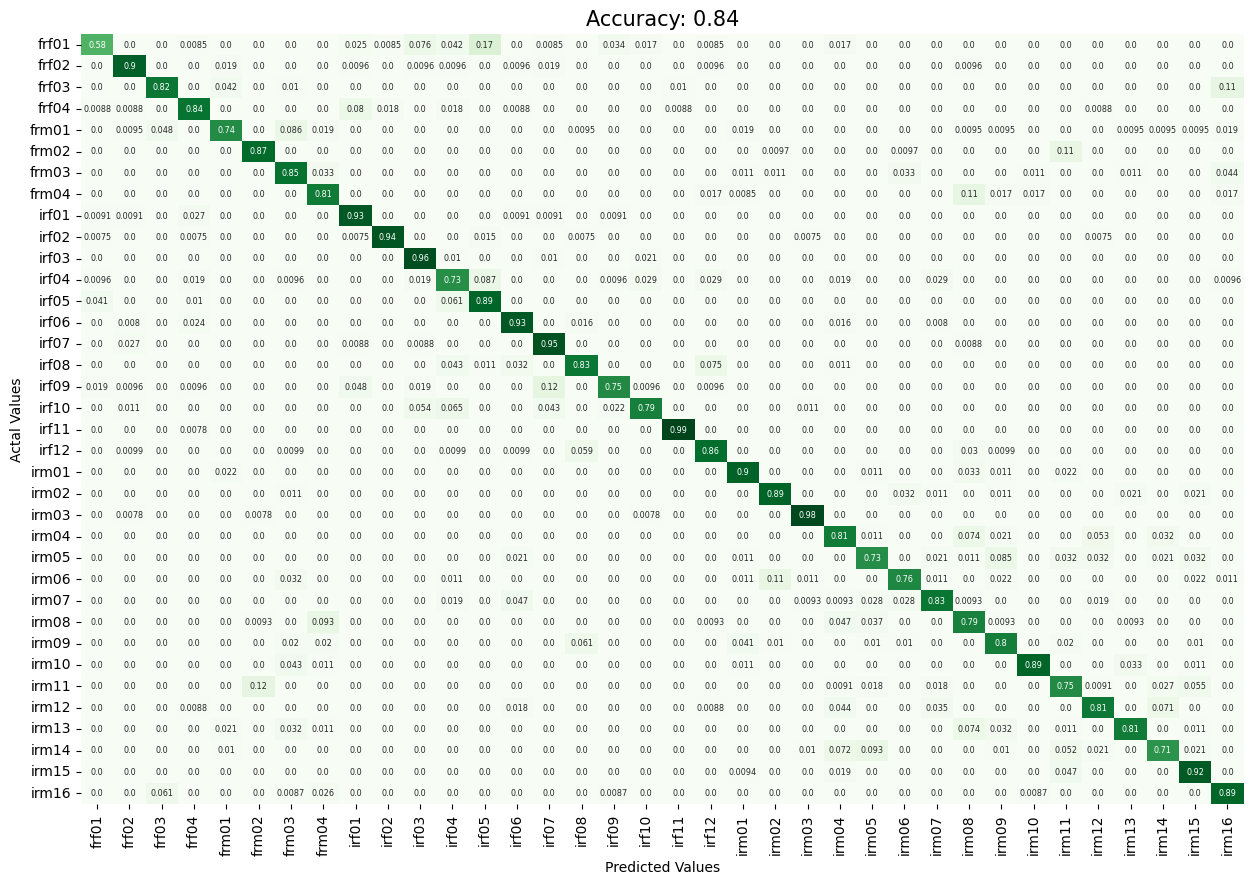

In [7]:
EPOCHS = 20
BATCH_SIZE = 16

#Load the extracted feature set for the SOLO dataset
X, y, filename = load_data(data_path = SOLO_FEATURES_EXPORT_PATH)

#Label encoding
le = LabelEncoder()
y_enc = le.fit_transform(y)

results = []
group_kfold_1 = GroupKFold(n_splits=5)
for i, (idx1, test_idx) in enumerate(group_kfold_1.split(X=X, y=y_enc, groups=filename)):
    print(f"Fold {i+1}:")
    X1 , y1, filename1 = X[idx1], y_enc[idx1], filename[idx1]
    X_test , y_test, filename_test = X[test_idx], y_enc[test_idx], filename[test_idx]

    group_kfold_2 = GroupKFold(n_splits=5)
    for j, (idx2, val_idx) in enumerate(group_kfold_2.split(X=X1, y=y1, groups=filename1)):
        if j > 0:
            break

        X_train , y_train = X1[idx2], y1[idx2]
        X_val , y_val = X1[val_idx], y1[val_idx]


        #Calculate the class weights (not totally necessary, the dataset is balanced in general)
        class_weights = compute_class_weight(
                                                class_weight = "balanced",
                                                classes = np.unique(y_train),
                                                y = y_train                                                   
                                            )
        class_weights = dict(zip(np.unique(y_train), class_weights))

        # Create the deep neural network
        input_shape = (X_train.shape[1], X_train.shape[2]) # timesteps=63, features=39
        n_classes = len(list(le.classes_))
        model = build_model(input_shape, n_classes)

        # Train model
        history = model.fit(
            X_train, y_train, 
            validation_data=(X_val, y_val), 
            batch_size=BATCH_SIZE, 
            epochs=EPOCHS, 
            class_weight=class_weights,
        )

        # plot accuracy/error for training and validation
        plot_history(history, fullpath=OUTPUT_PATH.joinpath(f'step_train_history_fold{i+1}.jpg'))

        #Make predictions
        y_prob = model.predict(X_test)
        y_pred = np.argmax(y_prob, axis=1)

        #Store results
        y_test = le.inverse_transform(y_test)
        y_pred = le.inverse_transform(y_pred)
        
        preds_df = pd.DataFrame({
            'label': y_test,
            'prediction': y_pred
        })
        probs_df = pd.DataFrame(data=y_prob, columns = list(le.classes_))
        results.append(pd.concat([preds_df, probs_df], axis=1))

results = pd.concat(results)
plot_confusion_matrix(results['label'].values, results['prediction'].values, norm=False, fullpath=OUTPUT_PATH.joinpath('step1_cm_agg.jpg'))
plot_confusion_matrix(results['label'].values, results['prediction'].values, norm=True, fullpath=OUTPUT_PATH.joinpath('step1_normalized_cm_agg.jpg'))

# Save features locally in pickle format
fname = OUTPUT_PATH.joinpath('step1_results_groupkfold.pickle')
fname.parent.mkdir(parents=True, exist_ok=True)
with open(fname, 'wb') as f:
    pickle.dump(results, f)

### 2. Assuming that you needed to apply the learned rules / models on the Fast Speech condition dataset, without having that (test) dataset beforehand, what you would do?
---
The goal is to approach the classification accuracy obtained on the train dataset to the test dataset, without using the latter for training. Describe any challenges (if they exist) and code your solution below following the same guidelines 

In [8]:
#Path initialization
FAST_DATASET_PATH = ROOT_DATASET_PATH.joinpath('data').joinpath('fast')
FAST_FEATURES_EXPORT_PATH = ROOT_DATASET_PATH.joinpath('fast_ftrs.pickle')

In [9]:
#Feature extraction for FAST dataset

#Create a list which contains all the audio files' paths in solo dataset
audiofiles_fast = list((FAST_DATASET_PATH).glob('**/*.wav'))

# Extract audio features for FAST dataset
create_features_dataset(filepaths=audiofiles_fast, exportpath=FAST_FEATURES_EXPORT_PATH)

Processing file frf01_s22_fast.wav !!!
Processing file frf01_s23_fast.wav !!!
Processing file frf01_s28_fast.wav !!!
Processing file frf01_s29_fast.wav !!!
Processing file frf01_s16_fast.wav !!!
Processing file frf01_s17_fast.wav !!!
Processing file frf01_f04_fast.wav !!!
Processing file frf01_s01_fast.wav !!!
Processing file frf01_s32_fast.wav !!!
Processing file frf01_s33_fast.wav !!!
Processing file frf01_f02_fast.wav !!!
Processing file frf01_f03_fast.wav !!!
Processing file frf01_s06_fast.wav !!!
Raised the exception: Input is too short (n=29241) for frame_length=32000 for file frf01_s06_fast.wav Skipping...
Processing file frf01_s07_fast.wav !!!
Processing file frf01_s25_fast.wav !!!
Processing file frf01_s24_fast.wav !!!
Processing file frf01_s11_fast.wav !!!
Raised the exception: Input is too short (n=28677) for frame_length=32000 for file frf01_s11_fast.wav Skipping...
Processing file frf01_s10_fast.wav !!!
Processing file frf01_s02_fast.wav !!!
Raised the exception: Input is 

Train a model with all SOLO data

Data loaded successfully!
Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_16 (LSTM)              (None, 63, 256)           303104    
                                                                 
 lstm_17 (LSTM)              (None, 256)               525312    
                                                                 
 dense_16 (Dense)            (None, 64)                16448     
                                                                 
 dropout_8 (Dropout)         (None, 64)                0         
                                                                 
 dense_17 (Dense)            (None, 36)                2340      
                                                                 
Total params: 847,204
Trainable params: 847,204
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20


2023-01-05 22:40:33.273597: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-01-05 22:40:33.599754: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-01-05 22:40:33.740775: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-01-05 22:40:33.909730: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-01-05 22:40:34.105918: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


237/237 [==============================] - 10s 37ms/step - loss: 3.4516 - accuracy: 0.0579
Epoch 2/20
237/237 [==============================] - 8s 34ms/step - loss: 2.9022 - accuracy: 0.1911
Epoch 3/20
237/237 [==============================] - 8s 34ms/step - loss: 2.2053 - accuracy: 0.3711
Epoch 4/20
237/237 [==============================] - 8s 34ms/step - loss: 1.6167 - accuracy: 0.5630
Epoch 5/20
237/237 [==============================] - 8s 34ms/step - loss: 1.2089 - accuracy: 0.6709
Epoch 6/20
237/237 [==============================] - 8s 34ms/step - loss: 0.9286 - accuracy: 0.7526
Epoch 7/20
237/237 [==============================] - 8s 35ms/step - loss: 0.7420 - accuracy: 0.8060
Epoch 8/20
237/237 [==============================] - 8s 34ms/step - loss: 0.5718 - accuracy: 0.8573
Epoch 9/20
237/237 [==============================] - 8s 34ms/step - loss: 0.4973 - accuracy: 0.8834
Epoch 10/20
237/237 [==============================] - 8s 34ms/step - loss: 0.4161 - accuracy: 0.9022

2023-01-05 22:43:18.640464: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-01-05 22:43:18.756719: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


 4/86 [>.............................] - ETA: 1s 

2023-01-05 22:43:18.868075: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


86/86 [==============================] - 2s 21ms/step


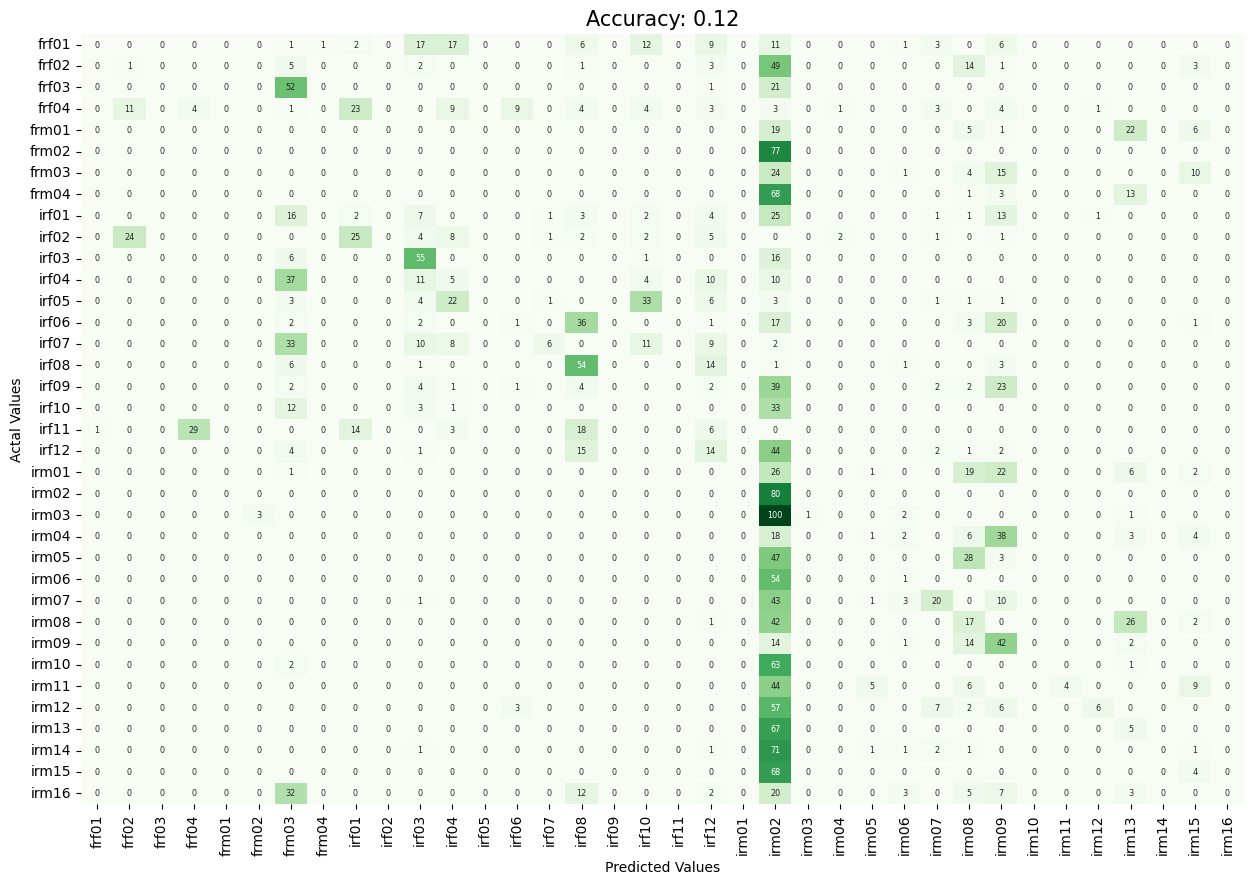

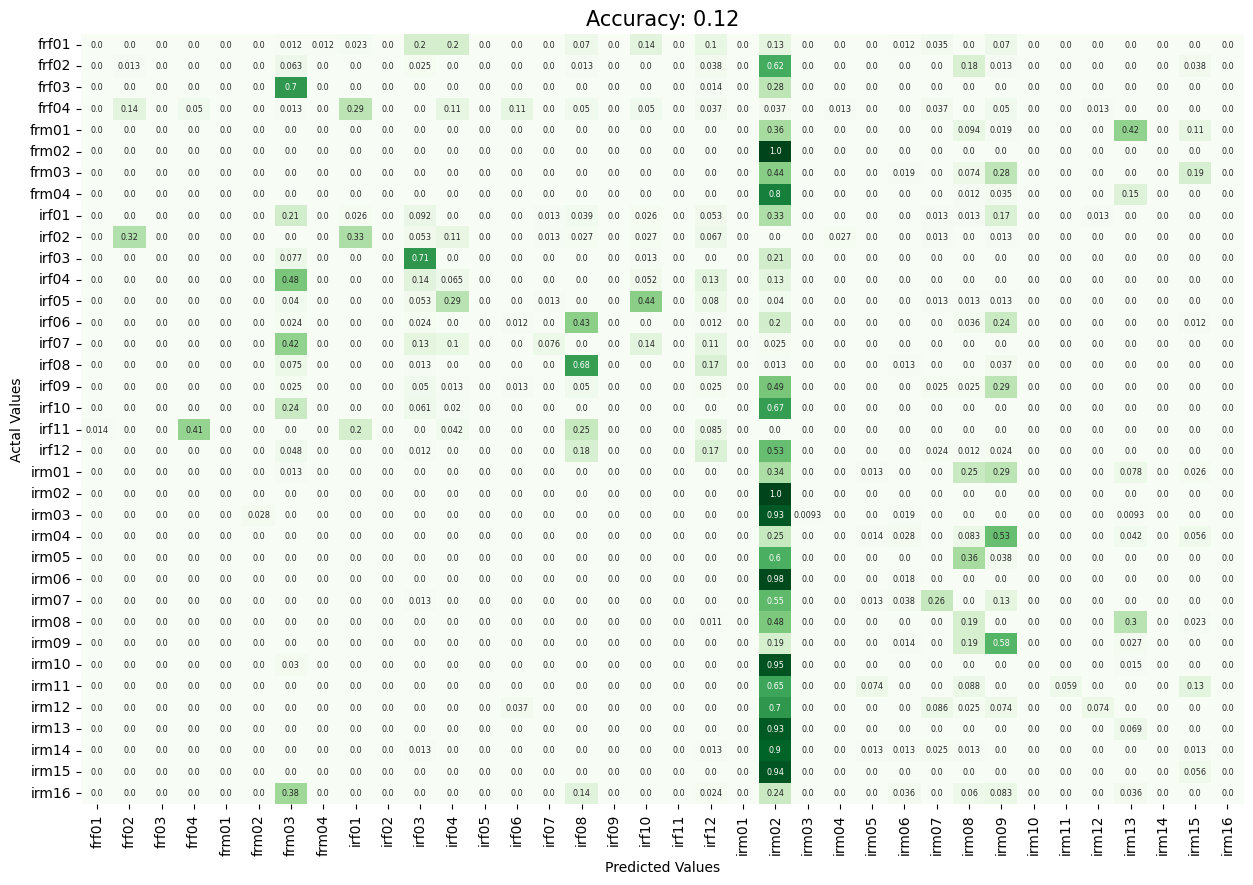

In [12]:
EPOCHS = 20
BATCH_SIZE = 16

#Load the extracted feature set for the SOLO dataset
X_train, y_train, filename_train = load_data(data_path = SOLO_FEATURES_EXPORT_PATH)

#Label encoding
le = LabelEncoder()
y_train = le.fit_transform(y_train)

#Calculate the class weights (not totally necessary, the dataset is balanced in general)
class_weights = compute_class_weight(
                                        class_weight = "balanced",
                                        classes = np.unique(y_train),
                                        y = y_train                                                   
                                    )
class_weights = dict(zip(np.unique(y_train), class_weights))

# Create the deep neural network
input_shape = (X_train.shape[1], X_train.shape[2]) # timesteps=63, features=39
n_classes = len(list(le.classes_))
model = build_model(input_shape, n_classes)

# Train model
history = model.fit(
    X_train, y_train, 
    batch_size=BATCH_SIZE, 
    epochs=EPOCHS, 
    class_weight=class_weights,
)

#Load the extracted feature set for the FAST dataset
X_test, y_test, filename_test = load_data(data_path = FAST_FEATURES_EXPORT_PATH)

#Make predictions
y_prob = model.predict(X_test)
y_pred = np.argmax(y_prob, axis=1)

y_pred = le.inverse_transform(y_pred)

preds_df = pd.DataFrame({
            'label': y_test,
            'prediction': y_pred
        })
probs_df = pd.DataFrame(data=y_prob, columns=list(le.classes_))
results = pd.concat([preds_df, probs_df], axis=1)

plot_confusion_matrix(results['label'].values, results['prediction'].values, norm=False, fullpath=OUTPUT_PATH.joinpath('step2_cm.jpg'))
plot_confusion_matrix(results['label'].values, results['prediction'].values, norm=True, fullpath=OUTPUT_PATH.joinpath('step2_normalized_cm.jpg'))

#Store results locally in pickle format
fname = OUTPUT_PATH.joinpath('step2_results.pickle')
fname.parent.mkdir(parents=True, exist_ok=True)
with open(fname, 'wb') as f:
    pickle.dump(results, f)

### 3. Another important task is to perform gender classification on the same datasets, but there are no available labels. You can use the entirety of data you have at your disposal. Describe possible approaches to this problem and code the most robust solution of your choice. 

In general, women speak at a higher pitch—about an octave higher than men. An adult woman's average range is from 165 to 255 Hz, while a man's is 85 to 155 Hz (see sources).

Due to the lack of gender labels I will try to classify the gender using the fundemental frequency of the corresponding audio file

I will create a mapping dictionary, that matches each user name with its gender to use that information for evaluation of my method

In [13]:
mapping_name_gender = {
    'frf01': 'female',
    'frf02': 'female',
    'frf03': 'female',
    'frf04': 'female',
    'irf01': 'female',
    'irf02': 'female',
    'irf03': 'female',
    'irf04': 'female',
    'irf05': 'female',
    'irf06': 'female',
    'irf07': 'female',
    'irf08': 'female',
    'irf09': 'female',
    'irf10': 'female',
    'irf11': 'female',
    'irf12': 'female',
    'frm01': 'male', 
    'frm02': 'male',
    'frm03': 'male',
    'frm04': 'male',
    'irm01': 'male',
    'irm02': 'male', 
    'irm03': 'male', 
    'irm04': 'male', 
    'irm05': 'male', 
    'irm06': 'male', 
    'irm07': 'male', 
    'irm08': 'male', 
    'irm09': 'male', 
    'irm10': 'male', 
    'irm11': 'male', 
    'irm12': 'male', 
    'irm13': 'male', 
    'irm14': 'male', 
    'irm15': 'male', 
    'irm16': 'male',
}

In [15]:
#Create a list which contains all the audio files' paths in solo and fast dataset
audiofiles_solo = list((SOLO_DATASET_PATH).glob('**/*.wav'))
audiofiles_fast = list((FAST_DATASET_PATH).glob('**/*.wav'))
SAMPLE_RATE = 22050

#Create a list in which will be appended dictionaries with extracted info for all the file
data = []

#Iterate through all audio files to extract the fundamental frequency f0
for f in audiofiles_solo+audiofiles_fast:

    #Extract source info of the proccessing file
    filename, source, corpus = f.parts[-1], f.parts[-2], f.parts[-3]

    #Load the audio file as floating point time series
    sig = audio_load(f, SAMPLE_RATE)

    #Apply the PYIN algorithm for extracting the F0 of the signal
    f0, voiced_flag, voiced_probs = librosa.pyin(
        sig,
        fmin=50,
        fmax=300,
        sr=SAMPLE_RATE
    )

    #Edge case, may the f0 array contain only NaNs
    if np.isnan(f0).all():
        print('All values of f0 array are NaNs, skipping')
        continue
    
    #Store all extractes info in a dictionary
    data.append(
        {
        "filename": filename,
        "corpus": corpus,
        "user": source,
        "mean_f0": np.nanmean(f0),
        "median_f0": np.nanmedian(f0)
        }
    )

#Create a pandas dataframe from list of dicts
df = pd.DataFrame(data)

#Map each row/user with the corresponding gender
df['gender'] = df['user'].map(mapping_name_gender)

#Store dataset locally in pickle format
fname = OUTPUT_PATH.joinpath('step3_dataset.pickle')
fname.parent.mkdir(parents=True, exist_ok=True)
with open(fname, 'wb') as f:
    pickle.dump(df, f)

All values of f0 array are NaNs, skipping
All values of f0 array are NaNs, skipping


<AxesSubplot: xlabel='gender', ylabel='median_f0'>

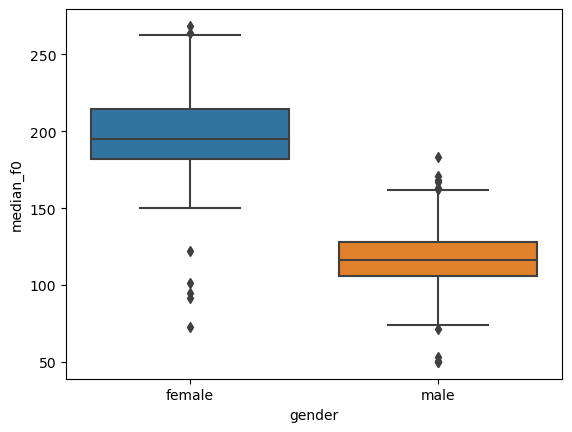

In [27]:
sns.boxplot(x='gender', y='median_f0', data=df)

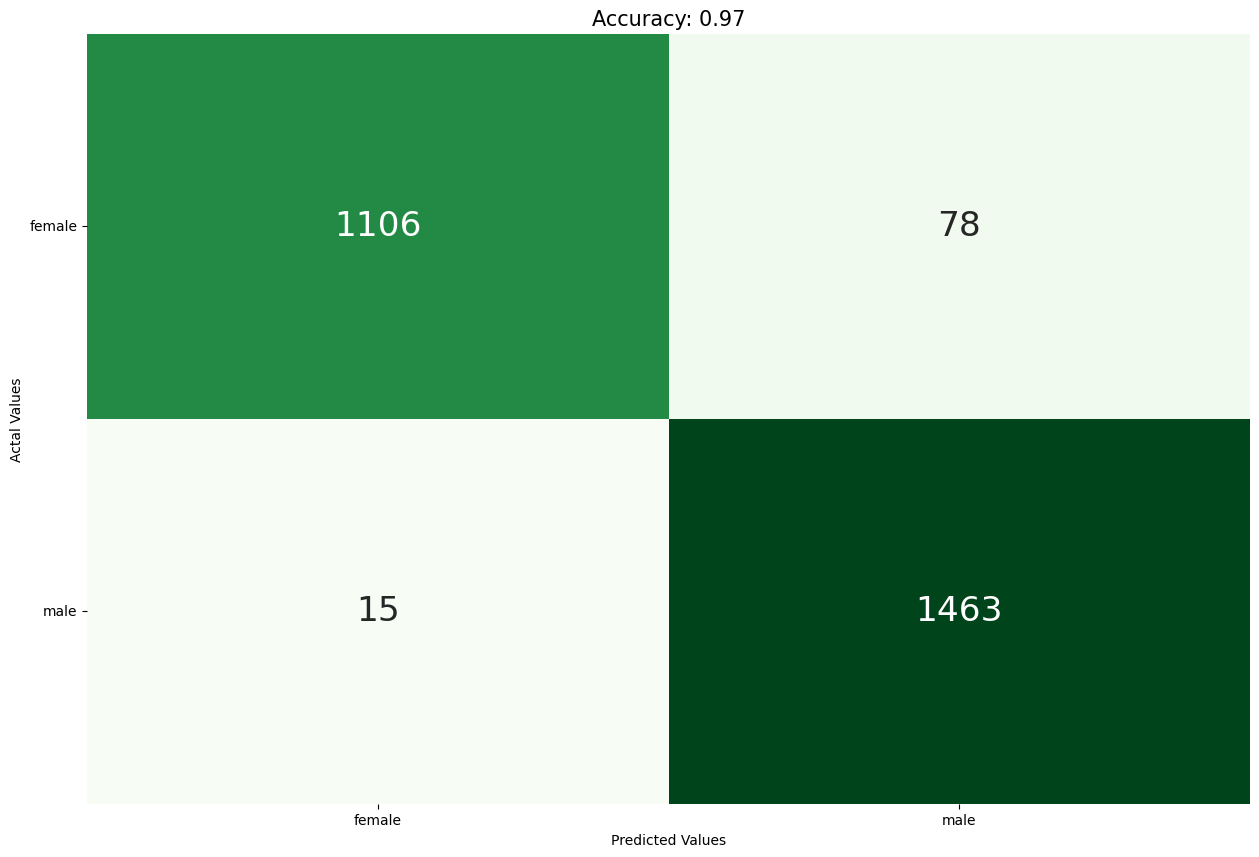

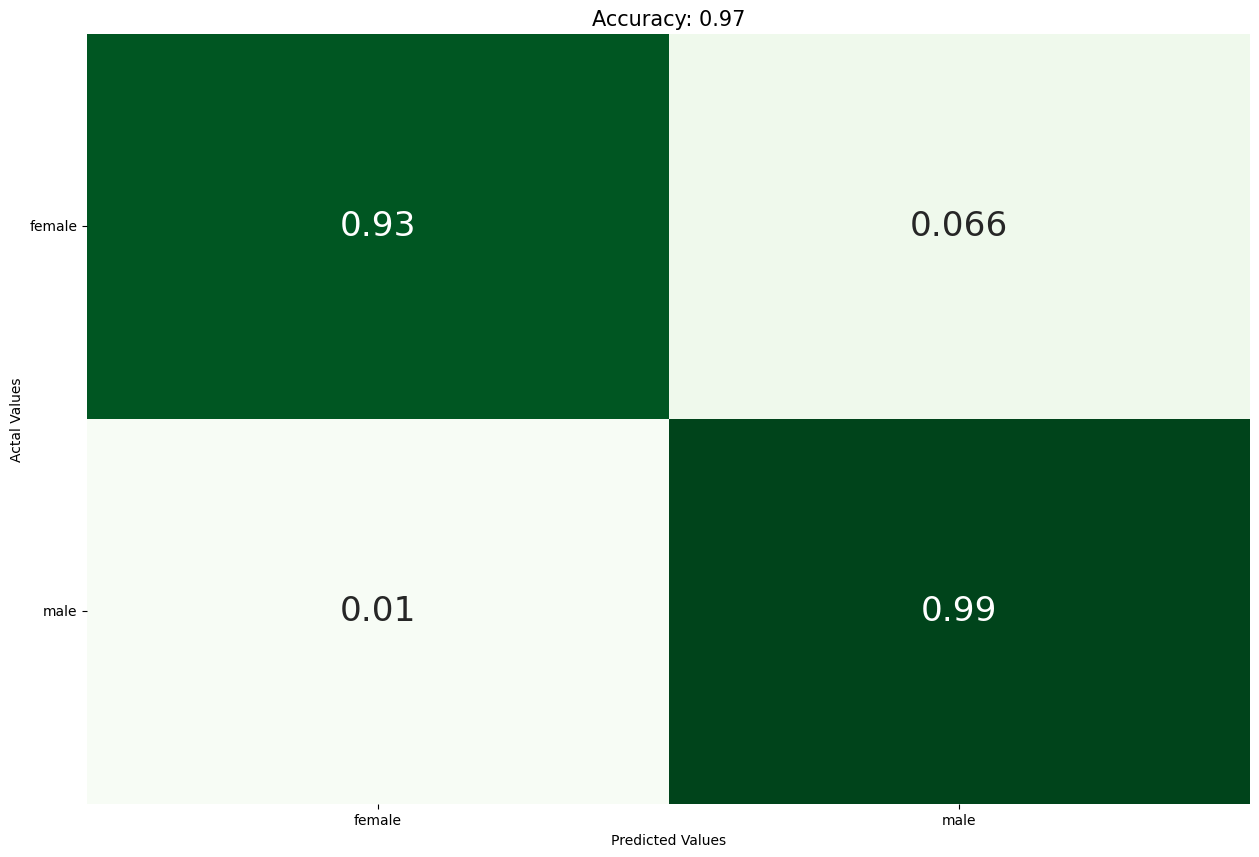

In [33]:
#Predict gender based on rule
threshold = 160 #Hz
df["prediction"] = df["median_f0"].apply(lambda x: 'female' if x>threshold else 'male')
plot_confusion_matrix(df['gender'].values, df['prediction'].values, norm=False, fullpath=OUTPUT_PATH.joinpath('step3_cm.jpg'))
plot_confusion_matrix(df['gender'].values, df['prediction'].values, norm=True, fullpath=OUTPUT_PATH.joinpath('step3_normalized_cm.jpg'))

## Thank you in advance. Good luck!